# Predicting Popularity 

## Business Understanding 

I have been hired by Apple Music to help improve their recommendation system and keep users engaged on their streaming service. Spotify, a competitor streaming service, has the best experience for the user when it comes to recommending songs and making playlists. 

Spotify leads the streaming platforms with over 400 million users and over 150 million premium subscirbers. Apple Music is at 88 million subscribers. With an improved recommendation system, I believe Apple Music can start to close the gap with Spotify.

The best first step in creating my content based recommendation system is to find an easy target to predict on. The easiest target in this dataframe is track_popularity because it is numerical, it is calculated by Spotify, and it helps get passed the cold start problem where a user has no prior data collected on the songs they listen to. 

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import surprise
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, roc_auc_score, plot_confusion_matrix, plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
pd.set_option('display.max_columns', 500)

In [5]:
df = pd.read_csv('../data/final_df.csv', index_col=0)

In [6]:
df

,track_id,track_name,track_popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_id,followers,genres,artist_name,artist_popularity
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,1922-02-22,0.645,0.44500,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.127,104.851,3,45tIt06XoI0Iio4LBEVpls,91.0,NaN,Uli,4
1,0PH9AACae1f957JAavhOl2,Lazy Boi,0,157333,0,1922-02-22,0.298,0.46000,1,-18.645,1,0.4530,0.521,0.856000,0.4360,0.402,87.921,4,45tIt06XoI0Iio4LBEVpls,91.0,NaN,Uli,4
2,2SiNuAZ6jIU9xhClRKXcST,Sketch,0,87040,0,1922-02-22,0.634,0.00399,5,-29.973,0,0.0377,0.926,0.919000,0.1050,0.396,79.895,4,45tIt06XoI0Iio4LBEVpls,91.0,NaN,Uli,4
3,4vV7uBcF2AnjNTOejBS5oL,L'enfer,0,40000,0,1922-02-22,0.657,0.32500,10,-14.319,0,0.2540,0.199,0.856000,0.0931,0.105,81.944,5,45tIt06XoI0Iio4LBEVpls,91.0,NaN,Uli,4
4,598LlBn6jpEpVbLjmZPsYV,Graphite,0,104400,0,1922-02-22,0.644,0.68400,7,-8.247,1,0.1990,0.144,0.802000,0.0847,0.138,100.031,4,45tIt06XoI0Iio4LBEVpls,91.0,NaN,Uli,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470033,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,2020-02-25,0.528,0.67300,4,-3.639,1,0.0314,0.143,0.000000,0.0989,0.297,130.066,4,5VGgFE9nPgMfEnYiPT5J2B,929.0,chinese viral pop,芝麻,36
470034,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,2020-10-30,0.609,0.01720,8,-28.573,1,0.1180,0.996,0.973000,0.1080,0.890,68.619,4,7vgGpuiXdNlCmc994PlMlz,23.0,instrumental lullaby,Laureen Conrad,52
470035,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,2020-03-20,0.562,0.03310,1,-25.551,1,0.1030,0.996,0.961000,0.1110,0.386,63.696,3,4MxqhahGRT4BPz1PilXGeu,91.0,instrumental lullaby,Gregory Oberle,55
470036,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,2020-09-26,0.560,0.51800,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.211,131.896,4,1QLBXKM5GCpyQQSVMNZqrZ,896.0,chinese viral pop,阿YueYue,38


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470038 entries, 0 to 470037
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   track_id           470038 non-null  object 
 1   track_name         470038 non-null  object 
 2   track_popularity   470038 non-null  int64  
 3   duration_ms        470038 non-null  int64  
 4   explicit           470038 non-null  int64  
 5   release_date       470038 non-null  object 
 6   danceability       470038 non-null  float64
 7   energy             470038 non-null  float64
 8   key                470038 non-null  int64  
 9   loudness           470038 non-null  float64
 10  mode               470038 non-null  int64  
 11  speechiness        470038 non-null  float64
 12  acousticness       470038 non-null  float64
 13  instrumentalness   470038 non-null  float64
 14  liveness           470038 non-null  float64
 15  valence            470038 non-null  float64
 16  te

Checking for null values.

In [8]:
df.isna().sum()

track_id                 0
track_name               0
track_popularity         0
duration_ms              0
explicit                 0
release_date             0
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
artist_id                0
followers                0
genres               37810
artist_name              0
artist_popularity        0
dtype: int64

In [9]:
df = df.dropna(subset=['genres'])

In [10]:
df.isna().sum()

track_id             0
track_name           0
track_popularity     0
duration_ms          0
explicit             0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
artist_id            0
followers            0
genres               0
artist_name          0
artist_popularity    0
dtype: int64

Creating a variable with only numeric data so that it is easier to run through a model.

In [11]:
x_cols = ['danceability', 'energy', 'loudness', 'key', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']

Separating my columns into X and y so that I can run a train_test_split for the models I will use to predict track popularity.

In [12]:
X = df[x_cols]

I set my target variable to be popular songs that are ranked 30 or higher because those tracks make up around 45% of my data frame.

In [13]:
len(df[df['track_popularity'] > 30]) / len(df)

0.47593399779745876

In [14]:
y = df['track_popularity'] >= 30

The following code is from lesson 5.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [16]:
y_train.value_counts(normalize=True)

False    0.505263
True     0.494737
Name: track_popularity, dtype: float64

In [17]:
scaler=StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
num_transformer = StandardScaler()

In [19]:
preprocessor = ColumnTransformer([
    ('nums', num_transformer, x_cols)
])

## Modeling Phase 

Before I run my models and plot my confusion matrices, I want to establish what a true positive, true negative, false positive, and false negative are in this business understanding. 

True positive: My model correctly predicts a song is popular. 

True negative: My model correctly predicts a song is not popular. 

False positive: My model predicts a song is popular when it is not. 

False negative: My model predicts a song is not popular when it is. 

I want to reduce false positives when a user is being recommended songs because I want to make sure they are listening to popular songs and stay engaged on Apple Music.

In [20]:
def evaluate(model, Xtr, Xte, ytr, yte):
    train_preds = model.predict(Xtr)
    test_preds = model.predict(Xte)

    train_probas = model.predict_proba(Xtr)[:,1]
    test_probas = model.predict_proba(Xte)[:,1]
    
    plot_confusion_matrix(model, Xte, yte)
    
    plot_roc_curve(model, Xte, yte)
    
    print(f"Train F1: {f1_score(ytr, train_preds):.4f}")
    print(f"Train Precision: {precision_score(ytr, train_preds):.4f}")
    print(f"Train ROC-AUC: {roc_auc_score(ytr, train_preds):.4f}")
    print(f"Test F1: {f1_score(yte, test_preds):.4f}")
    print(f"Test Precision: {precision_score(yte, test_preds):.4f}")
    print(f"Test ROC-AUC: {roc_auc_score(yte, test_preds):.4f}")

Created a function to make it easier to show evaluations for models.

## Decision Tree

I chose to run a decision tree model because of its easy interpretability, its use for making predictions, easy visualization, and quicker than other predictive models such as KNN.

The following code is from lesson 17. 

In [32]:
clf_dt = Pipeline(steps = [
    ('preprocessor', preprocessor), 
    ('tree', DecisionTreeClassifier(random_state=42, max_depth=15))
])

clf_dt.fit(X_train[x_cols], y_train)

train_preds = clf_dt.predict(X_train[x_cols])
test_preds = clf_dt.predict(X_test[x_cols])

train_probas = clf_dt.predict_proba(X_train[x_cols])[:,1]
test_probas = clf_dt.predict_proba(X_test[x_cols])[:,1]

In [33]:
print(f"Train Score: {clf_dt.score(X_train, y_train)}")
print(f"Test Score: {clf_dt.score(X_test, y_test)}")

Train Score: 0.7428658250227906
Test Score: 0.6397683614234836


Train F1: 0.7407
Train Precision: 0.7390
Train ROC-AUC: 0.7429
Test F1: 0.6382
Test Precision: 0.6376
Test ROC-AUC: 0.6398


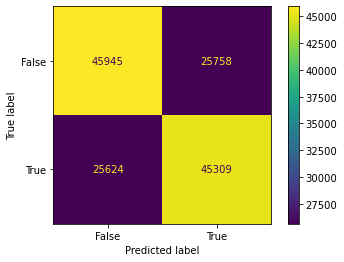

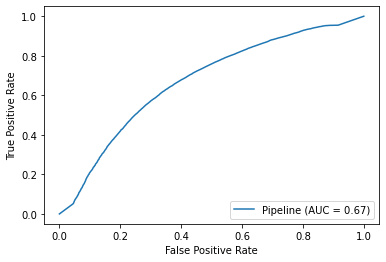

In [28]:
evaluate(clf_dt, X_train, X_test, y_train, y_test)

## Logistic Regression

I chose to run a Logistic Regression model because of its interpretability and its lack of need for tuning. 

The following code is from lesson 17. 

In [30]:
clf_lr = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('logreg', LogisticRegression())
])

clf_lr.fit(X_train[x_cols], y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('nums', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'key', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('logreg', LogisticRegression())])

In [31]:
print(f"Train Score: {clf_lr.score(X_train, y_train)}")
print(f"Test Score: {clf_lr.score(X_test, y_test)}")

Train Score: 0.650059393905909
Test Score: 0.6481533413724445


Train F1: 0.6530
Train Precision: 0.6409
Train ROC-AUC: 0.6502
Test F1: 0.6520
Test Precision: 0.6416
Test ROC-AUC: 0.6482


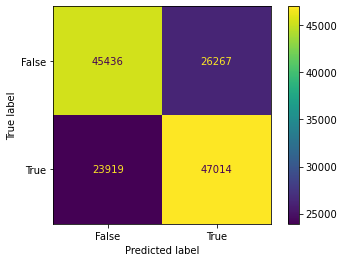

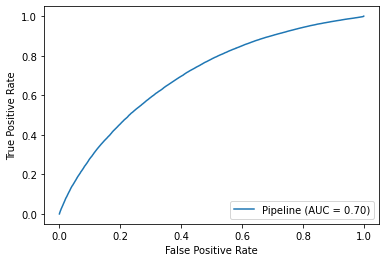

In [24]:
evaluate(clf_lr, X_train[x_cols], X_test[x_cols], y_train, y_test)

## XGBoost Model

I chose XGBoost model because it does a good job of handling large data frames and can handle missing data. 

In [21]:
clf_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('XGBoost', XGBClassifier(random_state=42, learning_rate=.25, 
                              max_depth=12, n_estimators=75))
])

clf_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('nums', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'key', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('XGBoost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=...amma=0, gpu_id=-1,
                               importance_type='gain',
                               int

In [22]:
print(f"Train Accuracy: {clf_xgb.score(X_train, y_train)}")
print(f"Test Accuracy: {clf_xgb.score(X_test, y_test)}")

Train Accuracy: 0.8262762783502307
Test Accuracy: 0.6657085167839816


Train F1: 0.8248
Train Precision: 0.8230
Train ROC-AUC: 0.8263
Test F1: 0.6629
Test Precision: 0.6649
Test ROC-AUC: 0.6657


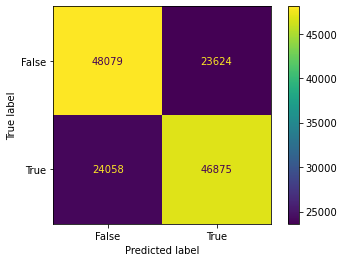

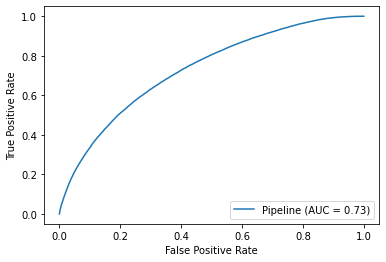

In [25]:
evaluate(clf_xgb, X_train, X_test, y_train, y_test)

## KNN Model

I chose to run a KNN model because it does a solid job of making predictions and has no training period which means that it can take in new data at any time and it will not effect the model.

The following code is from lesson 12. 

In [77]:
clf_knn = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('KNN', KNeighborsClassifier(n_neighbors=5))
])

clf_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('nums', StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'key', 'mode',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo',
                                                   'time_signature'])])),
                ('KNN', KNeighborsClassifier())])

In [26]:
print(f"Train Accuracy: {clf_knn.score(X_train, y_train)}")
print(f"Test Accuracy: {clf_knn.score(X_test, y_test)}")

Train Accuracy: 0.7573104707470033
Test Accuracy: 0.634021648733504


Train F1: 0.7414
Train Precision: 0.7428
Train ROC-AUC: 0.7563
Test F1: 0.6110
Test Precision: 0.6115
Test ROC-AUC: 0.6327


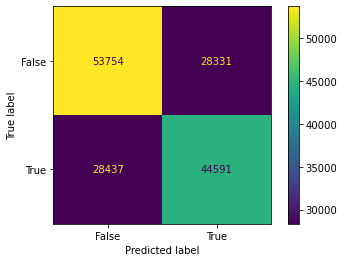

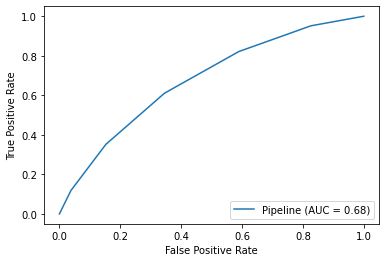

In [28]:
evaluate(clf_knn, X_train, X_test, y_train, y_test)

With KNN and XGBoost being my best models in terms of accuracy and lowest amount of false positives, I am going to continue to improve both models going forward and see which one I will use for my recommendation system. My main focus will be to minimize the number of false positives in my KNN confusion matrix. 

## Tuning KNN Model

In [62]:
knn_cv = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('KNN', KNeighborsClassifier())
])

In [63]:
param_grid = {
    'KNN__p':[1, 2],
    'KNN__weights':['uniform', 'distance'],
    'KNN__n_neighbors':[5, 9, 13, 17]
}

In [64]:
gs_knn = GridSearchCV(knn_cv, param_grid, cv=5, scoring='f1', verbose=1)


gs_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nums',
                                                                         StandardScaler(),
                                                                         ['danceability',
                                                                          'energy',
                                                                          'loudness',
                                                                          'key',
                                                                          'mode',
                                                                          'speechiness',
                                                                          'acousticness',
                                                                          'instrumentalness',
                                                         

In [66]:
gs_knn.best_params_

{'KNN__n_neighbors': 17, 'KNN__p': 1, 'KNN__weights': 'distance'}

In [67]:
gs_knn.best_score_

0.6381741827489732

## Tuning XGBoost Model

In [54]:
xgboost_cv = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('XGBoost', xgb.XGBClassifier())
])

In [55]:
param_xgb = {
    'XGBoost__learning_rate':[.25, .5, .75],
    'XGBoost__n_estimators':[5, 9, 13, 17], 
    'XGBoost__max_depth':[1, 5, 10]
}

In [56]:
gs_xgb = GridSearchCV(xgboost_cv, param_xgb, cv=5, scoring='f1', verbose=1)


gs_xgb.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  5.6min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('nums',
                                                                         StandardScaler(),
                                                                         ['danceability',
                                                                          'energy',
                                                                          'loudness',
                                                                          'key',
                                                                          'mode',
                                                                          'speechiness',
                                                                          'acousticness',
                                                                          'instrumentalness',
                                                         

In [57]:
gs_xgb.best_params_

{'XGBoost__learning_rate': 0.75,
 'XGBoost__max_depth': 1,
 'XGBoost__n_estimators': 5}

In [58]:
gs_xgb.best_score_

0.6659925656693341

The XGBoost model did better than the KNN model after running a GridSearch to find the best parameters to get the best score. I am going to use the XGBoost model to make my predictions. 

## Improved XGBoost model

In [24]:
xgb_model = xgb.XGBClassifier(random_state=42, learning_rate=.75, 
                              max_depth=1, n_estimators=5)

xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.75, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
print(f"Train Score: {xgb_model.score(X_train_scaled, y_train)}")
print(f"Test Score: {xgb_model.score(X_test_scaled, y_test)}")

Train Score: 0.6249274841846459
Test Score: 0.6251156790712022


Train F1: 0.6658
Train Precision: 0.5953
Train ROC-AUC: 0.6263
Test F1: 0.6667
Test Precision: 0.5975
Test ROC-AUC: 0.6258


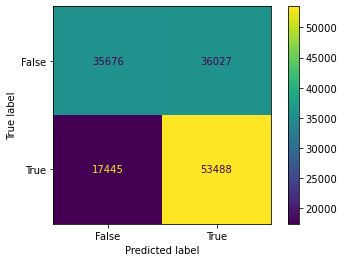

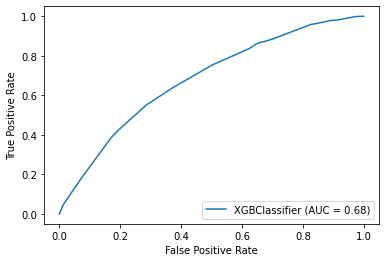

In [29]:
evaluate(xgb_model, X_train_scaled, X_test_scaled, y_train, y_test)

## Conclusions 



- I was able to make a model that can predict whether a song is popular or not with 62% accuracy and reduce the overfitting on my training data. 
- I was able to increase my true positives by nearly 7,000 songs. 
- We will miss out on 12% of songs that are actually positive. 